<a href="https://colab.research.google.com/github/HPereiraVitor/Lab6/blob/main/lol_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

dir = 'drive/MyDrive/Colab/lol/'
ranks = ['challenger', 'grandmaster', 'master']

data = pd.DataFrame()

for rank in ranks:
    chall_df = pd.read_csv(dir+rank+'-ranked.csv', error_bad_lines=False)
    chall_df['Rank'] = rank
    print("Size of {}: {}".format(rank,chall_df.shape))
    data = data.append(chall_df, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 12482: expected 50 fields, saw 80\n'


Size of challenger: (26903, 51)


b'Skipping line 18751: expected 50 fields, saw 59\n'


Size of grandmaster: (65895, 51)


b'Skipping line 12489: expected 50 fields, saw 96\n'


Size of master: (107124, 51)


In [8]:
print("Total size: {}".format(data.shape))

Total size: (199922, 51)


In [20]:
categories = ['Wins', 'FirstBlood', 'FirstTower',
       'FirstBaron', 'FirstDragon', 'FirstInhibitor',
       'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'AvgLevel',
       'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt']

for category in categories:
    chall_df = chall_df.drop(columns=['red'+category])

# Limpando dados que não queremos
X = chall_df.drop(columns=['gameId', 'gameDuraton', 'Rank', 'blueAvgLevel', 'blueTotalLevel', 'blueDeath', 'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt'])

# Queremos fazer os diagnósticos
y = chall_df['blueWins']

In [21]:
X = X.drop(columns=['blueJungleMinionKills'])

In [22]:
print(X.dtypes)

blueWins                   int64
blueFirstBlood             int64
blueFirstTower             int64
blueFirstBaron             int64
blueFirstDragon            int64
blueFirstInhibitor         int64
blueDragonKills            int64
blueBaronKills             int64
blueTowerKills             int64
blueInhibitorKills         int64
blueWardPlaced             int64
blueWardkills              int64
blueKills                  int64
blueAssist                 int64
blueChampionDamageDealt    int64
blueTotalGold              int64
blueTotalMinionKills       int64
dtype: object


In [23]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
# Treina com 80%
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo árvore de decisão com profundidade máxima 6
model = MLPClassifier(random_state=1, max_iter=2000)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Predição
y_pred = model.predict(X_test)

# Matriz de confusão
print('Matriz de Confusão')
print(confusion_matrix(y_test, y_pred))

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))

Matriz de Confusão
[[ 3453  7299]
 [    1 10672]]
Acurácia: 0.66


================================================================================

In [26]:
blue_percentage_data = {}

for category in categories:
    blue_total = data['blue'+category].sum()
    red_total = data['red'+category].sum()
    total = (blue_total + red_total).sum()
    
    blue_percent = blue_total/total
    red_percent = red_total/total
    
    blue_percentage_data[category] = blue_percent

blue_over = {k:v for k,v in blue_percentage_data.items() if (abs(v-0.5)>0.01) or k=="Wins"}
red_over = {k:1-v for k,v in blue_over.items()}

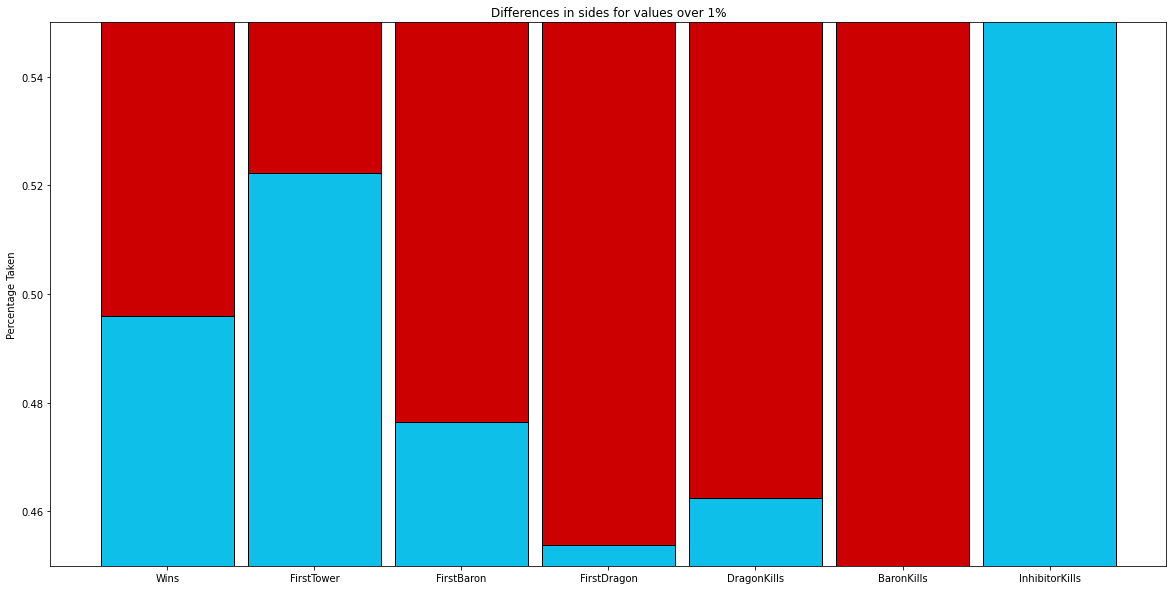

In [27]:
y = range(len(blue_over))
plt.figure(figsize=(20,10))
barWidth = 0.9
# blue
plt.bar(y, list(blue_over.values()), color='#0EBFE9', edgecolor='black', width=barWidth)
# red
plt.bar(y, list(red_over.values()), bottom=list(blue_over.values()), color='#cc0000', edgecolor='black', width=barWidth)

# Custom x axis
plt.xticks(y, blue_over.keys())
plt.ylim((0.45,0.55))
plt.ylabel("Percentage Taken")
plt.title("Differences in sides for values over 1%")
# Show graphic
plt.show()

In [28]:
blue_corr = data.drop('Rank', axis=1).corr()['blueWins'][:].sort_values(axis=0, ascending=False) 
red_corr = data.drop('Rank', axis=1).corr()['redWins'][:].sort_values(axis=0, ascending=False) 

blue_corr.head()

blueWins                 1.000000
blueTowerKills           0.717482
blueFirstInhibitor       0.658091
blueObjectDamageDealt    0.522644
blueFirstTower           0.464984
Name: blueWins, dtype: float64

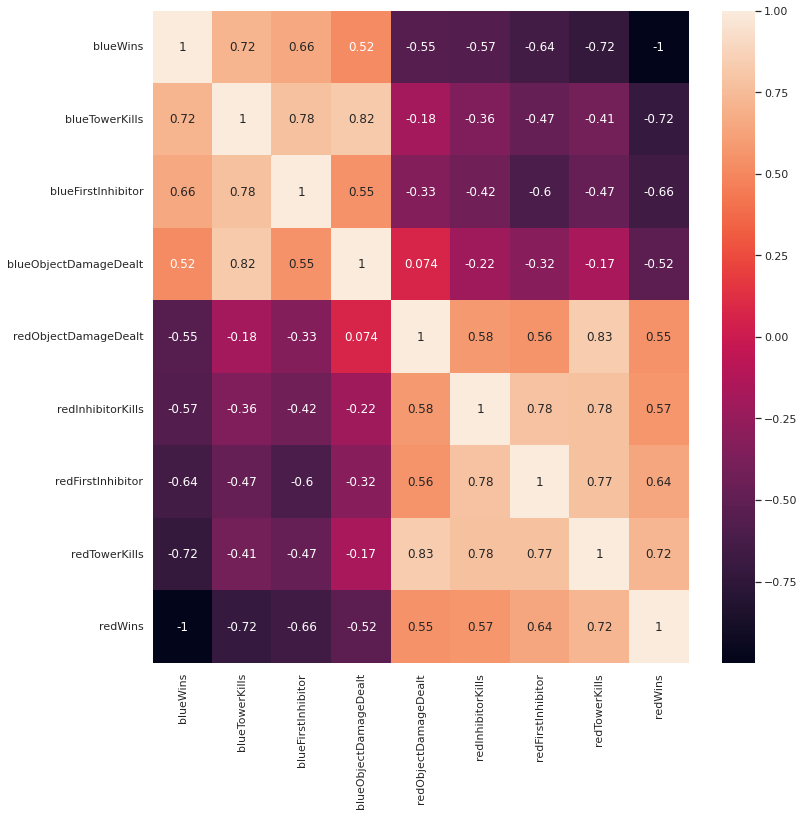

In [29]:
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(data[corr_cols].corr(), annot=True)